## 엑셀파일 읽고 쓰기

In [1]:
import pandas as pd

In [7]:
%pwd

'C:\\Users\\202-006\\Anaconda_src'

In [8]:
xls_file='./xls_data/test_score.xlsx'

In [9]:
df=pd.read_excel(xls_file,sheet_name=1)
df

,학생,과학,사회,역사,평균
0,A,90,95,85,90.000000
1,B,85,90,80,85.000000
2,C,70,80,75,75.000000
3,D,75,90,100,88.333333
4,E,90,80,90,86.666667


In [12]:
df=pd.read_excel(xls_file,sheet_name="기말고사")
df

,학생,과학,사회,역사,평균
0,A,90,95,85,90.000000
1,B,85,90,80,85.000000
2,C,70,80,75,75.000000
3,D,75,90,100,88.333333
4,E,90,80,90,86.666667


In [13]:
df=pd.read_excel(xls_file,sheet_name="기말고사",index_col=0) #o번째인 "학생"을 컬럼으로 잡기
df

,과학,사회,역사,평균
학생,,,,
A,90,95,85,90.000000
B,85,90,80,85.000000
C,70,80,75,75.000000
D,75,90,100,88.333333
E,90,80,90,86.666667


In [14]:
df=pd.read_excel(xls_file,sheet_name="기말고사",index_col="학생")
df

,과학,사회,역사,평균
학생,,,,
A,90,95,85,90.000000
B,85,90,80,85.000000
C,70,80,75,75.000000
D,75,90,100,88.333333
E,90,80,90,86.666667


In [18]:
df=pd.read_excel(xls_file,sheet_name="기말고사",index_col=4) 
df

,학생,과학,사회,역사
평균,,,,
90.000000,A,90,95,85
85.000000,B,85,90,80
75.000000,C,70,80,75
88.333333,D,75,90,100
86.666667,E,90,80,90


In [19]:
excel_exam_data1 = {
    '학생': ['A', 'B', 'C', 'D', 'E', 'F'],
    '국어': [80, 90, 95, 70, 75, 85],
    '영어': [90, 95, 70, 85, 90, 95],
    '수학': [85, 95, 75, 80, 85, 100]
}

df1 = pd.DataFrame(excel_exam_data1,columns=['학생','국어','영어','수학'] )
df1


,학생,국어,영어,수학
0,A,80,90,85
1,B,90,95,95
2,C,95,70,75
3,D,70,85,80
4,E,75,90,85
5,F,85,95,100


In [24]:
excel_exam_data2 = {
    '학생': ['A', 'B', 'C', 'D', 'E', 'F'],
    '국어': [85, 95, 75, 80, 85, 100],
    '영어': [80, 90, 95, 70, 75, 85],
    '수학': [90, 95, 70, 85, 90, 95]
}

df2 = pd.DataFrame(excel_exam_data2,columns=['학생','국어','영어','수학'] )


excel_writer = pd.ExcelWriter('./xls_data/test_score3.xlsx', engine='xlsxwriter')

df1.to_excel(excel_writer, index=False,sheet_name='중간고사') 
# index=False  index인 0,1,2,3,4,5를 만들지 않는다
df2.to_excel(excel_writer, index=False,sheet_name="기말고사") 


excel_writer.save()

## 엑셀파일 통합

In [52]:
import pandas as pd
import glob   #파일 그룹으로 묶어서 불러 올 때 
import re     #변경

In [53]:
xls_file_1 = './xls_data/담당자별_판매실적_윤종필사원.xlsx'
xls_file_2 = './xls_data/담당자별_판매실적_홍성민대리.xlsx'
xls_file_3 = './xls_data/담당자별_판매실적_신은영과장.xlsx'

In [54]:
excel_data_files=[xls_file_1,xls_file_2,xls_file_3]

In [55]:
total_data=pd.DataFrame()

In [56]:
for f in excel_data_files:
    df=pd.read_excel(f)
    total_data=total_data.append(df)
    
total_data

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,아이폰XR,윤종필,용산구,198,123,120,137
1,갤럭시S10,윤종필,용산구,273,241,296,217
2,애플와치4,윤종필,용산구,385,316,355,331
0,아이폰XR,홍성민,성동구,154,108,155,114
1,갤럭시S10,홍성민,성동구,200,223,213,202
2,애플와치4,홍성민,성동구,350,340,377,392
0,아이폰XR,신은영,영등포,168,102,149,174
1,갤럭시S10,신은영,영등포,231,279,277,292
2,애플와치4,신은영,영등포,365,383,308,323


In [57]:
for f in excel_data_files:
    df=pd.read_excel(f)
    total_data=total_data.append(df,ignore_index=True)
    #ignore_index=True일 때는 그낭 순서대로만 False일때는  본래 index번호로
    
total_data

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,아이폰XR,윤종필,용산구,198,123,120,137
1,갤럭시S10,윤종필,용산구,273,241,296,217
2,애플와치4,윤종필,용산구,385,316,355,331
3,아이폰XR,홍성민,성동구,154,108,155,114
4,갤럭시S10,홍성민,성동구,200,223,213,202
5,애플와치4,홍성민,성동구,350,340,377,392
6,아이폰XR,신은영,영등포,168,102,149,174
7,갤럭시S10,신은영,영등포,231,279,277,292
8,애플와치4,신은영,영등포,365,383,308,323
9,아이폰XR,윤종필,용산구,198,123,120,137


In [59]:
import glob

glob.glob("./xls_data/담당자별_판매실적_*.xlsx")

['./xls_data\\담당자별_판매실적_신은영과장.xlsx',
 './xls_data\\담당자별_판매실적_윤종필사원.xlsx',
 './xls_data\\담당자별_판매실적_홍성민대리.xlsx']

In [62]:
excel_data_files1 = glob.glob("./xls_data/담당자별_판매실적_*.xlsx")
total_data1 = pd.DataFrame()

for f in excel_data_files1:
    df = pd.read_excel(f)
    total_data1 = total_data1.append(df, ignore_index=True)

total_data1

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,아이폰XR,신은영,영등포,168,102,149,174
1,갤럭시S10,신은영,영등포,231,279,277,292
2,애플와치4,신은영,영등포,365,383,308,323
3,아이폰XR,윤종필,용산구,198,123,120,137
4,갤럭시S10,윤종필,용산구,273,241,296,217
5,애플와치4,윤종필,용산구,385,316,355,331
6,아이폰XR,홍성민,성동구,154,108,155,114
7,갤럭시S10,홍성민,성동구,200,223,213,202
8,애플와치4,홍성민,성동구,350,340,377,392


## 파일 저장

In [63]:
excel_file_name = './xls_data/마케팅팀_판매실적_통합.xlsx'

excel_total_file_writer = pd.ExcelWriter(excel_file_name, engine='xlsxwriter')
total_data1.to_excel(excel_total_file_writer, index=False, sheet_name='판매실적_통합')
excel_total_file_writer.save()

glob.glob(excel_file_name)

['./xls_data/마케팅팀_판매실적_통합.xlsx']

## 파일 변경

In [64]:
df = pd.read_excel(xls_file_1)
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,아이폰XR,윤종필,용산구,198,123,120,137
1,갤럭시S10,윤종필,용산구,273,241,296,217
2,애플와치4,윤종필,용산구,385,316,355,331


In [65]:
df.loc[2, '4분기'] = 0  #하나의 대이터 변경
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,아이폰XR,윤종필,용산구,198,123,120,137
1,갤럭시S10,윤종필,용산구,273,241,296,217
2,애플와치4,윤종필,용산구,385,316,355,0


In [66]:
df.loc[3, '제품명'] = '노트10'
df.loc[3, '담당자'] = '김재경'
df.loc[3, '지역'] = '구로구'
df.loc[3, '1분기'] = 100
df.loc[3, '2분기'] = 150
df.loc[3, '3분기'] = 200
df.loc[3, '4분기'] = 250

df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,아이폰XR,윤종필,용산구,198.0,123.0,120.0,137.0
1,갤럭시S10,윤종필,용산구,273.0,241.0,296.0,217.0
2,애플와치4,윤종필,용산구,385.0,316.0,355.0,0.0
3,노트10,김재경,구로구,100.0,150.0,200.0,250.0


In [67]:
df['담당자']="김재경" #데이터 셋 변겅
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,아이폰XR,김재경,용산구,198.0,123.0,120.0,137.0
1,갤럭시S10,김재경,용산구,273.0,241.0,296.0,217.0
2,애플와치4,김재경,용산구,385.0,316.0,355.0,0.0
3,노트10,김재경,구로구,100.0,150.0,200.0,250.0


In [68]:
#저장

xls_file_4 = './xls_data/담당자별_판매실적_김재경사원.xlsx'

new_excel_file = pd.ExcelWriter(xls_file_4, engine='xlsxwriter')
df.to_excel(new_excel_file, index=False)
new_excel_file.save()

# glob.glob(excel_file_name)


## 여러 개의 엑셀 파일에서 데이터 수정

In [69]:
# 파일 복사

file_name  = './xls_data/담당자별_판매실적_윤종필사원.xlsx'

new_file_name = re.sub(".xlsx", "2.xlsx", file_name)
new_file_name

'./xls_data/담당자별_판매실적_윤종필사원2.xlsx'

In [71]:
# 원하는 문자열이 포함된 파일을 검색해 리스트를 할당

# ("data/담당자별_판매실적_*.xlsx") 에서 *은 모든글자 ?는 한개의 글자

excel_data_files = glob.glob("xls_data/담당자별_판매실적_*.xlsx")
excel_data_files

['xls_data\\담당자별_판매실적_김재경사원.xlsx',
 'xls_data\\담당자별_판매실적_신은영과장.xlsx',
 'xls_data\\담당자별_판매실적_윤종필사원.xlsx',
 'xls_data\\담당자별_판매실적_홍성민대리.xlsx']

In [74]:
for f in excel_data_files:
    df=pd.read_excel(f)
    
    #이름변경
    if(df.loc[1,'담당자']=='윤종필'):
        df['담당자']='윤종필사원'
    elif(df.loc[1, '담당자']=='홍성민'):
        df['담당자']='홍성민대리'
    elif(df.loc[1, '담당자']=='신은영'):
        df['담당자']='신은영과장' 
    elif(df.loc[1, '담당자']=='김재경'):
        df['담당자']='김재경사원'        
        
    #파일명 변경
    f_new=re.sub('.xlsx','_v2.xlsx',f)
    print(f_new)
    
    #수정된 값 변겅
    new_excel_file = pd.ExcelWriter(f_new, engine='xlsxwriter')
    df.to_excel(new_excel_file, index=False)
    new_excel_file.save()

xls_data\담당자별_판매실적_김재경사원_v2.xlsx
xls_data\담당자별_판매실적_신은영과장_v2.xlsx
xls_data\담당자별_판매실적_윤종필사원_v2.xlsx
xls_data\담당자별_판매실적_홍성민대리_v2.xlsx


## 엑셀의 필터 기능 수행

In [75]:
df = pd.read_excel('./xls_data/마케팅팀_판매실적_통합.xlsx')
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,아이폰XR,신은영,영등포,168,102,149,174
1,갤럭시S10,신은영,영등포,231,279,277,292
2,애플와치4,신은영,영등포,365,383,308,323
3,아이폰XR,윤종필,용산구,198,123,120,137
4,갤럭시S10,윤종필,용산구,273,241,296,217
5,애플와치4,윤종필,용산구,385,316,355,331
6,아이폰XR,홍성민,성동구,154,108,155,114
7,갤럭시S10,홍성민,성동구,200,223,213,202
8,애플와치4,홍성민,성동구,350,340,377,392


In [76]:
df['제품명']

0     아이폰XR
1    갤럭시S10
2     애플와치4
3     아이폰XR
4    갤럭시S10
5     애플와치4
6     아이폰XR
7    갤럭시S10
8     애플와치4
Name: 제품명, dtype: object

In [80]:
#내가 원하는 제품 가져오기
galuxy=df[df['제품명']=='갤럭시S10']
#galuxy= df[df['제품명'].isin(['갤럭시S10'])]
galuxy

,제품명,담당자,지역,1분기,2분기,3분기,4분기
1,갤럭시S10,신은영,영등포,231,279,277,292
4,갤럭시S10,윤종필,용산구,273,241,296,217
7,갤럭시S10,홍성민,성동구,200,223,213,202


In [83]:
#여러개 불를 때
apple=df[(df['제품명']=='아이폰XR')|(df["제품명"]=='애플와치4')]
#apple= df[df['제품명'].isin(['아이폰XR', '애플와치4'])]
apple

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,아이폰XR,신은영,영등포,168,102,149,174
2,애플와치4,신은영,영등포,365,383,308,323
3,아이폰XR,윤종필,용산구,198,123,120,137
5,애플와치4,윤종필,용산구,385,316,355,331
6,아이폰XR,홍성민,성동구,154,108,155,114
8,애플와치4,홍성민,성동구,350,340,377,392


## 조건을 설정해 원하는 행만 선택

In [84]:
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,아이폰XR,신은영,영등포,168,102,149,174
1,갤럭시S10,신은영,영등포,231,279,277,292
2,애플와치4,신은영,영등포,365,383,308,323
3,아이폰XR,윤종필,용산구,198,123,120,137
4,갤럭시S10,윤종필,용산구,273,241,296,217
5,애플와치4,윤종필,용산구,385,316,355,331
6,아이폰XR,홍성민,성동구,154,108,155,114
7,갤럭시S10,홍성민,성동구,200,223,213,202
8,애플와치4,홍성민,성동구,350,340,377,392


In [85]:
df[(df['1분기']>=300)]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,애플와치4,신은영,영등포,365,383,308,323
5,애플와치4,윤종필,용산구,385,316,355,331
8,애플와치4,홍성민,성동구,350,340,377,392


In [87]:
df[(df['1분기']>=300)&(df['3분기']>=350)]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
5,애플와치4,윤종필,용산구,385,316,355,331
8,애플와치4,홍성민,성동구,350,340,377,392


## 원하는 열만 선택

In [88]:
df=pd.read_excel(xls_file_3)
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,아이폰XR,신은영,영등포,168,102,149,174
1,갤럭시S10,신은영,영등포,231,279,277,292
2,애플와치4,신은영,영등포,365,383,308,323


In [89]:
df[['제품명','1분기','2분기','3분기','4분기']]

,제품명,1분기,2분기,3분기,4분기
0,아이폰XR,168,102,149,174
1,갤럭시S10,231,279,277,292
2,애플와치4,365,383,308,323


In [92]:
df.iloc[:,[0,3,4,5,6]]  #df.iloc[:,[본래 columns명의 위치번호]]

,제품명,1분기,2분기,3분기,4분기
0,아이폰XR,168,102,149,174
1,갤럭시S10,231,279,277,292
2,애플와치4,365,383,308,323


In [93]:
df.iloc[:,[0,4]]

,제품명,2분기
0,아이폰XR,102
1,갤럭시S10,279
2,애플와치4,383


## 엑셀 데이터 계산

In [94]:
df = pd.read_excel('./xls_data/마케팅팀_판매실적_통합.xlsx')

iPhone = df[(df['제품명']== '아이폰XR')]
iPhone

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,아이폰XR,신은영,영등포,168,102,149,174
3,아이폰XR,윤종필,용산구,198,123,120,137
6,아이폰XR,홍성민,성동구,154,108,155,114


In [95]:
iPhone.sum(axis=1)

0    593
3    578
6    531
dtype: int64

In [97]:
#새로 만들어진 데이터의 행렬 만들기

iPhone_sum = pd.DataFrame(iPhone.sum(axis=1), columns = ['연간판매량'])
iPhone_sum

,연간판매량
0,593
3,578
6,531


In [98]:
#추가된 자료 합치기
iPhone_total = iPhone.join(iPhone_sum)
iPhone_total

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
0,아이폰XR,신은영,영등포,168,102,149,174,593
3,아이폰XR,윤종필,용산구,198,123,120,137,578
6,아이폰XR,홍성민,성동구,154,108,155,114,531


In [100]:
iPhone_total.sort_values(by='연간판매량', ascending=True)  
#ascending이 True면 내림차순  False면 오름차순

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
6,아이폰XR,홍성민,성동구,154,108,155,114,531
3,아이폰XR,윤종필,용산구,198,123,120,137,578
0,아이폰XR,신은영,영등포,168,102,149,174,593


## 열의 합계

In [101]:
iPhone_sum2 = pd.DataFrame(iPhone_total.sum(), columns=['합계'])
iPhone_sum2

,합계
제품명,아이폰XR아이폰XR아이폰XR
담당자,신은영윤종필홍성민
지역,영등포용산구성동구
1분기,520
2분기,333
3분기,424
4분기,425
연간판매량,1702


In [103]:
iPhone_sum2.T

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
합계,아이폰XR아이폰XR아이폰XR,신은영윤종필홍성민,영등포용산구성동구,520,333,424,425,1702


In [104]:
iPhone_total2  = iPhone_total.append(iPhone_sum2.T)
iPhone_total2

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
0,아이폰XR,신은영,영등포,168,102,149,174,593
3,아이폰XR,윤종필,용산구,198,123,120,137,578
6,아이폰XR,홍성민,성동구,154,108,155,114,531
합계,아이폰XR아이폰XR아이폰XR,신은영윤종필홍성민,영등포용산구성동구,520,333,424,425,1702


In [105]:
#내용 변경하기

iPhone_total2.loc['합계', '제품명'] = '아이폰XR	'
iPhone_total2.loc['합계', '담당자'] = '전체'
iPhone_total2.loc['합계', '지역']   = '전체'
iPhone_total2

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
0,아이폰XR,신은영,영등포,168,102,149,174,593
3,아이폰XR,윤종필,용산구,198,123,120,137,578
6,아이폰XR,홍성민,성동구,154,108,155,114,531
합계,아이폰XR\t,전체,전체,520,333,424,425,1702


In [119]:
def get_product_total(xls_file, product_name):
    df=pd.read_excel('./xls_data/마케팅팀_판매실적_통합.xlsx')

    #조건이 성립하는 행 고르기
    product='갤럭시S10'
    galuxy=df[(df['제품명']==product)]

    #행별 합계구하고 마지막 열에 추가
    gal_sum = pd.DataFrame(galuxy.sum(axis=1), columns = ['연간판매량'])
    gal_total = galuxy.join(gal_sum)

    #열별 합계구하고 마지막행 추가
    gal_sum2 = pd.DataFrame(gal_total.sum(), columns = ['합계'])
    gal_total2 = gal_total.append(gal_sum2.T)

    #지정목록 수정
    gal_total2.loc['합계', '제품명'] = product
    gal_total2.loc['합계', '담당자'] = '전체'
    gal_total2.loc['합계', '지역'  ] = '전체'

    return gal_total2

In [120]:
xls_file = './xls_data/마케팅팀_판매실적_통합.xlsx'
prd_name = '갤럭시S10'

galaxy_total = get_product_total(xls_file, prd_name)
galaxy_total

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
1,갤럭시S10,신은영,영등포,231,279,277,292,1079
4,갤럭시S10,윤종필,용산구,273,241,296,217,1027
7,갤럭시S10,홍성민,성동구,200,223,213,202,838
합계,갤럭시S10,전체,전체,704,743,786,711,2944


## 엑셀데이터 시각화

In [121]:
from IPython.display import Image

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']        = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [122]:
sales = {'시간' : [  9, 10, 11, 12, 13, 14, 15 ],
         '제품1': [ 10, 15, 12, 11, 12, 14, 13 ],
         '제품2': [  9, 11, 14, 12, 13, 10, 12 ]
}

df = pd.DataFrame(sales, index = sales['시간'], columns = ['제품1', '제품2'])
df

,제품1,제품2
9,10,9
10,15,11
11,12,14
12,11,12
13,12,13
14,14,10
15,13,12


In [123]:
#index 라벨 추가
df.index.name = '시간' 
df

,제품1,제품2
시간,,
9,10,9
10,15,11
11,12,14
12,11,12
13,12,13
14,14,10
15,13,12


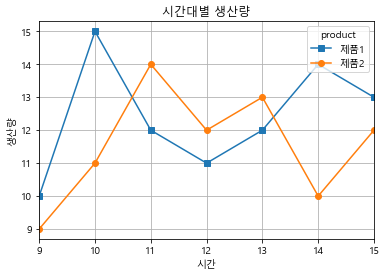

In [135]:
# product_plot = df.plot(grid = True, style = ['-*', '-o'], title='시간대별 생산량')

product_plot = df.plot(grid = True, style = ['-s', '-o'])

product_plot.set_title('시간대별 생산량')

product_plot.set_ylabel("생산량")

product_plot.legend(title='product',loc=1)
                        

    
    
fig_file = './xls_data/sales0829.png'  # 이미지 파일 경로 및 이름
plt.savefig(fig_file, dpi = 1000)           # 그래프를 이미지 파일로 저장

plt.show()

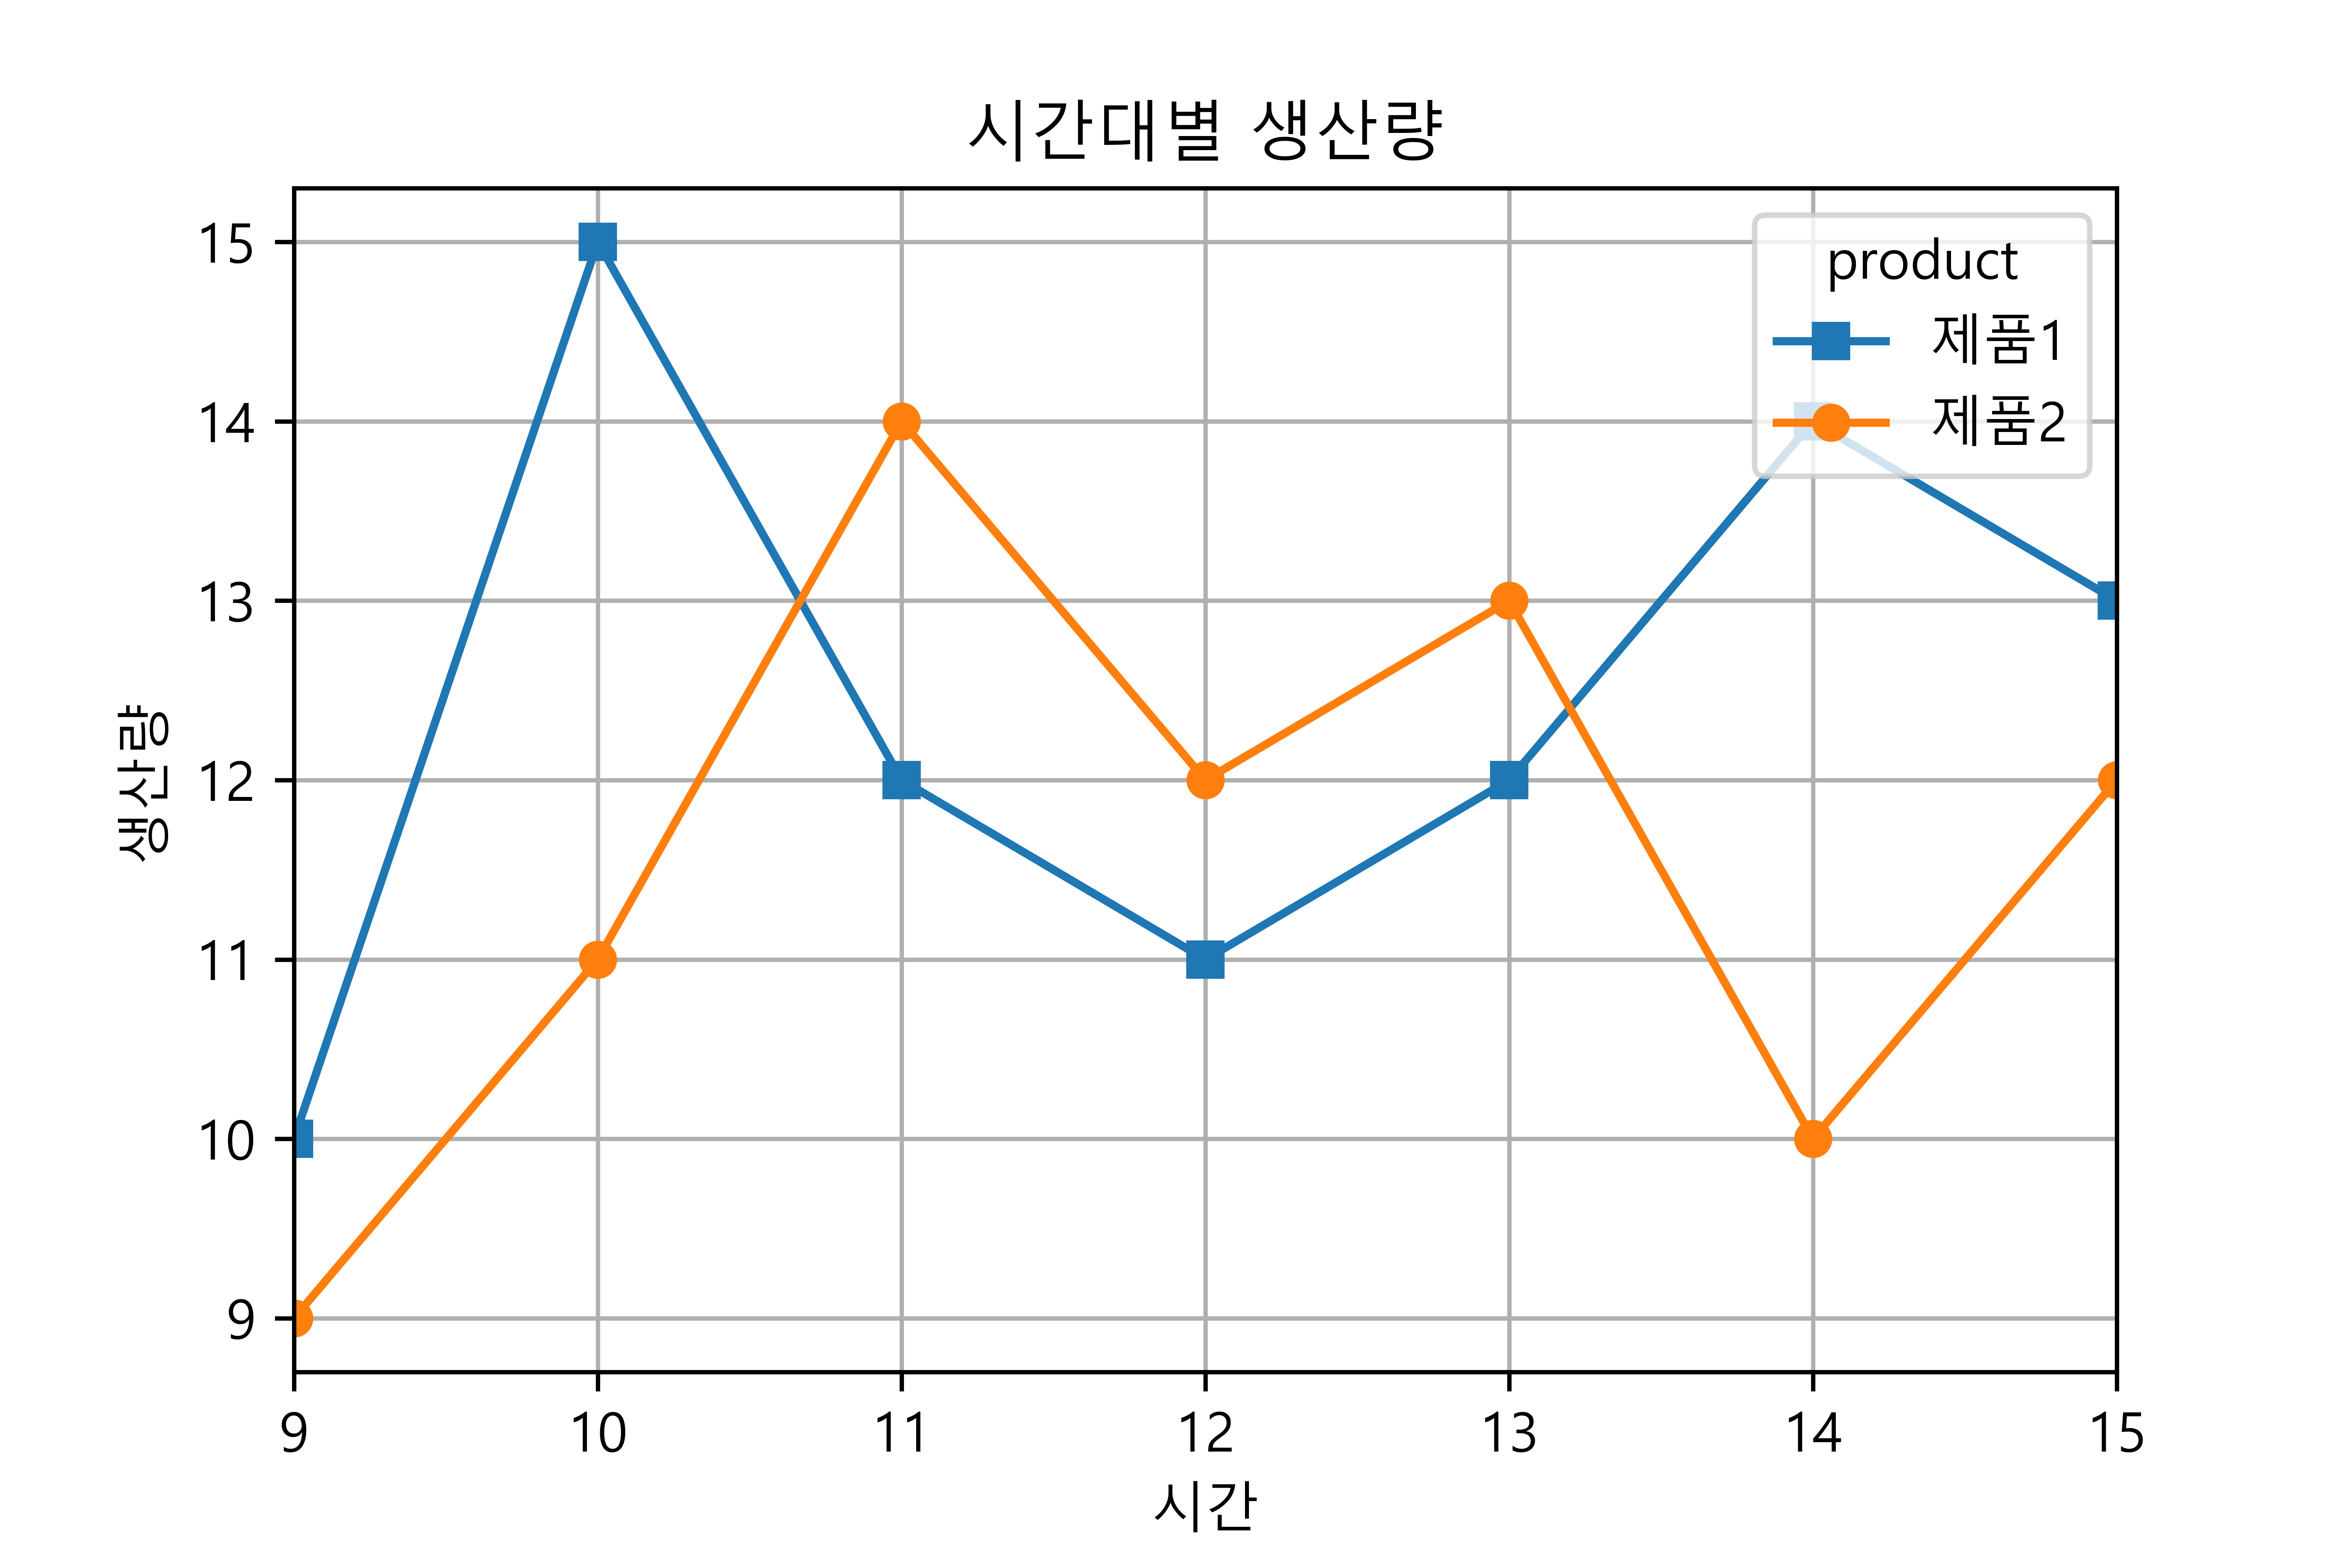

In [136]:
Image(fig_file)

## 엑셀 이미지 추가

In [138]:
# (1) pandas의 ExcelWriter 객체 생성
excel_file   = './xls_data/data_image_to_excel.xlsx'
excel_writer = pd.ExcelWriter(excel_file, engine='xlsxwriter')

# (2) DataFrame 데이터를 지정된 엑셀 시트(Sheet)에 쓰기
df.to_excel(excel_writer, index=True, sheet_name='sales')

# (3) ExcelWriter 객체에서 워크시트(worksheet) 객체 생성
worksheet = excel_writer.sheets['sales']

# (4) 워크시트에 차트가 들어갈 위치를 지정해 이미지 넣기
worksheet.insert_image('D2', fig_file, {'x_scale': 0.7, 'y_scale': 0.7})
# worksheet.insert_image(시작위치, 이미지, {'x_scale': 0.7, 'y_scale': 0.7})

# (5) ExcelWriter 객체를 닫고 엑셀 파일 출력
excel_writer.save()

In [147]:
# (1) pandas의 ExcelWriter 객체 생성
excel_file  = './xls_data/data_chart_in_excel.xlsx'
excel_chart = pd.ExcelWriter(excel_file, engine='xlsxwriter')

# (2) DataFrame 데이터를 지정된 엑셀 시트(Sheet)에 쓰기
df.to_excel(excel_chart, index=True, sheet_name='sales')

# (3) ExcelWriter 객체에서 워크북(workbook)과 워크시트(worksheet) 객체 생성
workbook  = excel_chart.book
worksheet = excel_chart.sheets['sales']

# (4) 차트 객체 생성(원하는 차트의 종류 지정)
chart = workbook.add_chart({'type': 'line'})

# (5) 차트 생성을 위한 데이터값의 범위 지정 
#chart.add_series({'values': '=sales!$B$2:$B$8'})
#chart.add_series({'values': '=sales!$C$2:$C$8'})
chart.add_series({'values'    : '=sales!$B$2:$B$8', 
                  'categories': '=sales!$A$2:$A$8',
                  'name'      : '=sales!$B$1',})

chart.add_series({'values'    : '=sales!$C$2:$C$8', 
                  'categories': '=sales!$A$2:$A$8',
                  'name'      : '=sales!$C$1',})

#(6) 엑셀 차트에 제목과 x,y축 라벨 추가
chart.set_title ({'name': '시간대별 생산량'})
chart.set_x_axis({'name': '시간'})
chart.set_y_axis({'name': '생산량'})



# (7) 워크시트에 차트가 들어갈 위치를 지정해 차트 넣기
worksheet.insert_chart('D2', chart)

# (8) ExcelWriter 객체를 닫고 엑셀 파일 출력
excel_chart.save()